## Assignment 2

In [1]:
__author__ = "Pattarapon Buathong 62070504012 AE"

# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Analysis

### <ins>Decision variables</ins>
##### x = number of cupboard produced in this week
##### y = number of door produced in this week

### <ins>Objective function</ins>
##### To maximize: combined sum of the units of cupboards and the units of doors in stock at the end of the week
##### Maximize: (x+30-75) + (y+90-95) --> x+y-50

### <ins>Constraints</ins>
##### Convert hours to minutes
##### 50x + 24y <= 40(60) # Machine A
##### 30x + 33y <= 35(60) # Machine B

### <ins>Non-negativity restrictions</ins>
##### x >= 75 - 30 (Forecast - Stock) --> x >= 45
##### y >= 95 - 90 (Forecast - Stock) --> y >= 5

In [12]:
# x >= 45
x = np.linspace(45, 55, 1000000)
print(x)

[45.      45.00001 45.00002 ... 54.99998 54.99999 55.     ]


In [4]:
# y >= 5
y1 = np.linspace(5, 5, 1000000)
print(y1)

[5. 5. 5. ... 5. 5. 5.]


In [5]:
# 50x + 24y <= 40(60)
y2 = (2400 - 50*x)/24
print(y2)

[  6.25         6.24997917   6.24995833 ... -14.58329167 -14.5833125
 -14.58333333]


In [6]:
# 30x + 33y <= 35(60)
y3 = (2100 - 30*x)/33
print(y3)

[22.72727273 22.72726364 22.72725455 ... 13.63638182 13.63637273
 13.63636364]


In [7]:
x45 = np.linspace(45, 45, 1000000)
y_for_vert = np.linspace(0, 10, 1000000)
print(y_for_vert)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01]


## Linear Function Figure Plot

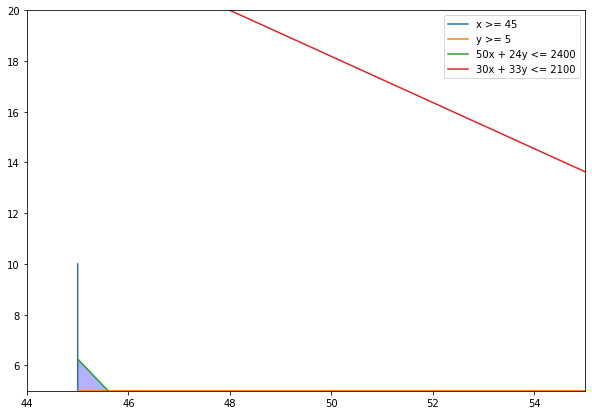

In [8]:
# Plotting linear functions
plt.figure(figsize=(10, 7))
# plt.axvline(x=45, color="black")
plt.plot(x45, y_for_vert, label="x >= 45")
plt.plot(x, y1, label="y >= 5")
plt.plot(x, y2, label="50x + 24y <= 2400")
plt.plot(x, y3, label="30x + 33y <= 2100")
plt.xlim((44, 55))
plt.ylim((5, 20))

y4 = np.minimum(y_for_vert, y1)
plt.fill_between(x, y4, y2, color="blue", alpha=0.3)

plt.legend()
plt.show()

## Calculating optimal objective and product

In [13]:
# 3 intersections -> [x, y1], [x, y2], [y1, y2]

# Identify the intersections
intersec1 = (x[0], y1[0])

intersec2 = (x[0], y2[0])

idx3 = np.argwhere(np.isclose(y1, y2, atol=0.0001)==True)[0][0]
intersec3 = (x[idx3], y2[idx3])

# print(intersec1, intersec2, intersec3)

# Declare the objective function
def objective_function(x, y):
    J = x+y-50
    return J

# Provide * before tuple variable
objective1 = objective_function(*intersec1)
objective2 = objective_function(*intersec2)
objective3 = objective_function(*intersec3)

# Create a list of intersections and costs
objective_list = [objective1, objective2, objective3]
product = [intersec1, intersec2, intersec3]
# print(objective_list)

lowest_idx = np.argmax(objective_list)
optimal_objective = objective_list[lowest_idx]
product = product[lowest_idx]

print("Optimal Objective: ", optimal_objective)
print("Optimal Product", optimal_machine)

Optimal Objective:  1.25
Optimal Product (45.0, 6.25)


## How many of each product to make in the current week?

### Number of cupboard = 45
### Number of door = 6.25
### According to https://cs.stackexchange.com/questions/51951/why-cant-we-round-results-of-linear-programming-to-get-integer-programming
### Since there are no constraint that place upper limit for door (only y>=5)
### Therefore, I think we will produce 7 doors instead.